## Define the problem and Read the data.

In [216]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [217]:
!kaggle competitions download -c playground-series-s4e12

playground-series-s4e12.zip: Skipping, found more recently modified local copy (use --force to force download)


In [218]:
import zipfile
zip_ref = zipfile.ZipFile('/content/playground-series-s4e12.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
data = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [222]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


# EDA

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

##### __Customer Feedback__ column

In [224]:
print(data['Customer Feedback'].isnull().sum())
print(test['Customer Feedback'].isnull().sum())

77824
52276


In [225]:
data['Customer Feedback'].value_counts()

,count
Customer Feedback,
Average,377905
Poor,375518
Good,368753


**Impute the Customer Feedback column with OHE**

In [226]:
data['Customer Feedback'].fillna(data['Customer Feedback'].mode()[0],inplace=True)
test['Customer Feedback'].fillna(test['Customer Feedback'].mode()[0],inplace=True)

<ipython-input-226-d45ae3605072>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer Feedback'].fillna(data['Customer Feedback'].mode()[0],inplace=True)
<ipython-input-226-d45ae3605072>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [227]:
# Apply get_dummies to the DataFrame, specifying the column
data = pd.get_dummies(data, columns=['Customer Feedback'], drop_first=True)
test = pd.get_dummies(test, columns=['Customer Feedback'], drop_first=True)

In [228]:
data.shape,test.shape

((1200000, 22), (800000, 21))

##### __Insurance Duration__ column

In [229]:
print(data['Insurance Duration'].isnull().sum())
print(test['Insurance Duration'].isnull().sum())

1
2


In [230]:
data['Insurance Duration'].value_counts()

,count
Insurance Duration,
9.0,137781
1.0,135072
8.0,133800
7.0,133592
5.0,132253
4.0,132182
6.0,132141
3.0,132018
2.0,131160


In [231]:
data['Insurance Duration'].fillna(data['Insurance Duration'].mode()[0],inplace=True)
test['Insurance Duration'].fillna(test['Insurance Duration'].mode()[0],inplace=True)

<ipython-input-231-b24037700636>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Insurance Duration'].fillna(data['Insurance Duration'].mode()[0],inplace=True)
<ipython-input-231-b24037700636>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [232]:
data['Insurance Duration'].value_counts()

,count
Insurance Duration,
9.0,137782
1.0,135072
8.0,133800
7.0,133592
5.0,132253
4.0,132182
6.0,132141
3.0,132018
2.0,131160


In [233]:
data = pd.get_dummies(data, columns=['Insurance Duration'], drop_first=True)
test = pd.get_dummies(test, columns=['Insurance Duration'], drop_first=True)

In [234]:
data.shape,test.shape

((1200000, 29), (800000, 28))

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  object 
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  object 
 7   Occupation              841925 non-null   object 
 8   Health Score            1125924 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         835971 non-null   float64
 12  Vehicle Age             1199994 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

In [236]:
objectType = []
for i in data.columns:
  if data[i].dtype == 'object':
    objectType.append(i)

In [237]:
# df = data.copy()
# tf = test.copy()
# data.shape,test.shape

In [238]:
# data = pd.get_dummies(data, columns=objectType, drop_first=True)
# test = pd.get_dummies(test, columns=objectType, drop_first=True)

In [239]:
data.shape,test.shape

((1200000, 29), (800000, 28))

##### __Credit Score__ column

In [240]:
print(data['Credit Score'].isnull().sum())
print(test['Credit Score'].isnull().sum())

137882
91451


<Axes: xlabel='Credit Score'>

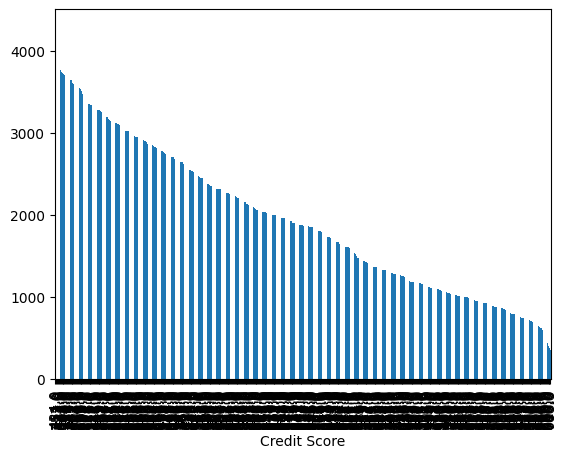

In [241]:
data['Credit Score'].value_counts().plot(kind='bar')

##### __Vehicle Age__ column

In [242]:
print(data['Vehicle Age'].isnull().sum())
print(test['Vehicle Age'].isnull().sum())

6
3


<Axes: ylabel='Density'>

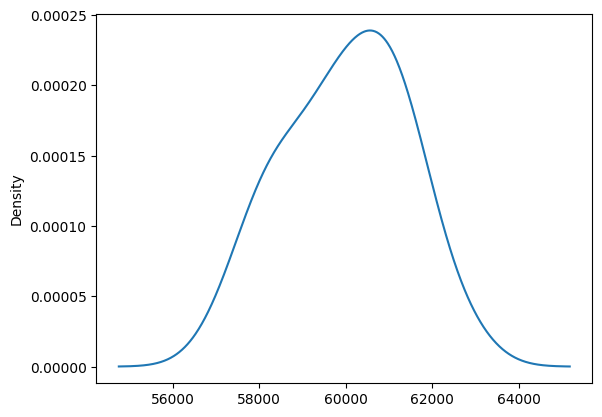

In [243]:
data['Vehicle Age'].value_counts().plot(kind='kde')

In [244]:
test['Vehicle Age'].value_counts()

,count
Vehicle Age,
11.0,41556
17.0,41406
14.0,40827
18.0,40735
0.0,40617
10.0,40501
19.0,40484
15.0,40405
16.0,40328


In [245]:
data['Vehicle Age'].fillna(7.0,inplace=True)
test['Vehicle Age'].fillna(7.0,inplace=True)

<ipython-input-245-6c30d9509947>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Age'].fillna(7.0,inplace=True)
<ipython-input-245-6c30d9509947>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<Axes: ylabel='Density'>

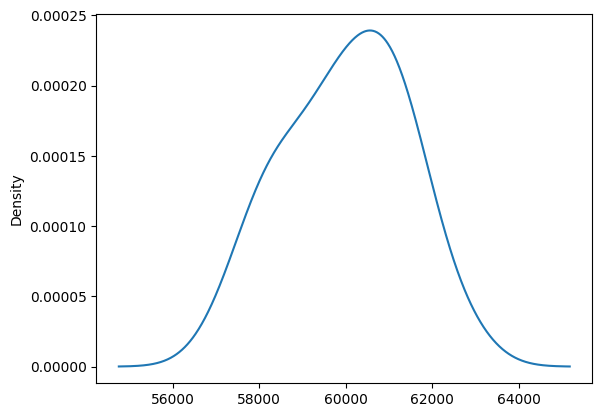

In [246]:
data['Vehicle Age'].value_counts().plot(kind='kde')

In [247]:
print(data['Vehicle Age'].isnull().sum())
print(test['Vehicle Age'].isnull().sum())

0
0


##### __Previous Claims__ column

In [248]:
print(data['Previous Claims'].isnull().sum())
print(test['Previous Claims'].isnull().sum())

364029
242802


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  object 
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  object 
 7   Occupation              841925 non-null   object 
 8   Health Score            1125924 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         835971 non-null   float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

In [250]:
test['Previous Claims'].value_counts()

,count
Previous Claims,
0.0,202806
1.0,200881
2.0,112100
3.0,32753
4.0,7021
5.0,1393
6.0,204
7.0,28
9.0,8


In [251]:
df_PC_thereshold = 10667
tf_PC_thereshold = 7020
df_pC_count = data['Previous Claims'].value_counts()
tf_pC_count = test['Previous Claims'].value_counts()
replce_df_PC = df_pC_count[df_PC_thereshold>df_pC_count].index
replce_tf_PC = tf_pC_count[tf_PC_thereshold>tf_pC_count].index

In [252]:
data['Previous Claims'] = data['Previous Claims'].replace(replce_df_PC,5.0)
test['Previous Claims'] = test['Previous Claims'].replace(replce_tf_PC,5.0)

In [253]:
data['Previous Claims'].value_counts()

,count
Previous Claims,
0.0,305433
1.0,300811
2.0,167661
3.0,49011
4.0,10668
5.0,2387


In [254]:
data['Previous Claims'].fillna(data['Previous Claims'].mode()[0],inplace=True)
test['Previous Claims'].fillna(test['Previous Claims'].mode()[0],inplace=True)

<ipython-input-254-8211dd385040>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Previous Claims'].fillna(data['Previous Claims'].mode()[0],inplace=True)
<ipython-input-254-8211dd385040>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  object 
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  object 
 7   Occupation              841925 non-null   object 
 8   Health Score            1125924 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         1200000 non-null  float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

##### __Health Score__ column

In [256]:
print(data['Health Score'].isnull().sum())
print(test['Health Score'].isnull().sum())

74076
49449


<ipython-input-257-5ddb8bead40a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Health Score'], kde=True)


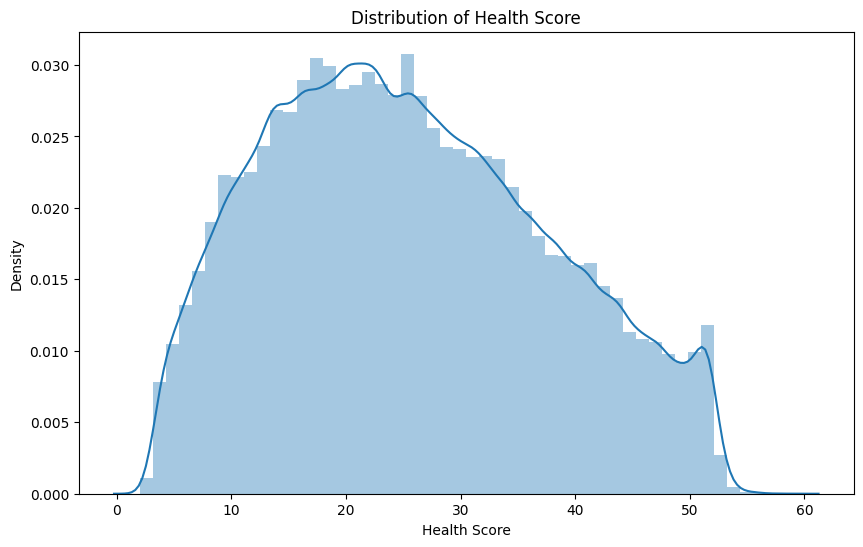

In [257]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Health Score'], kde=True)
plt.title('Distribution of Health Score')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.show()

In [258]:
# data['Health Score'].mean()

In [259]:
# data['Health Score'].fillna(data['Health Score'].mean(),inplace=True)
# test['Health Score'].fillna(test['Health Score'].mean(),inplace=True)

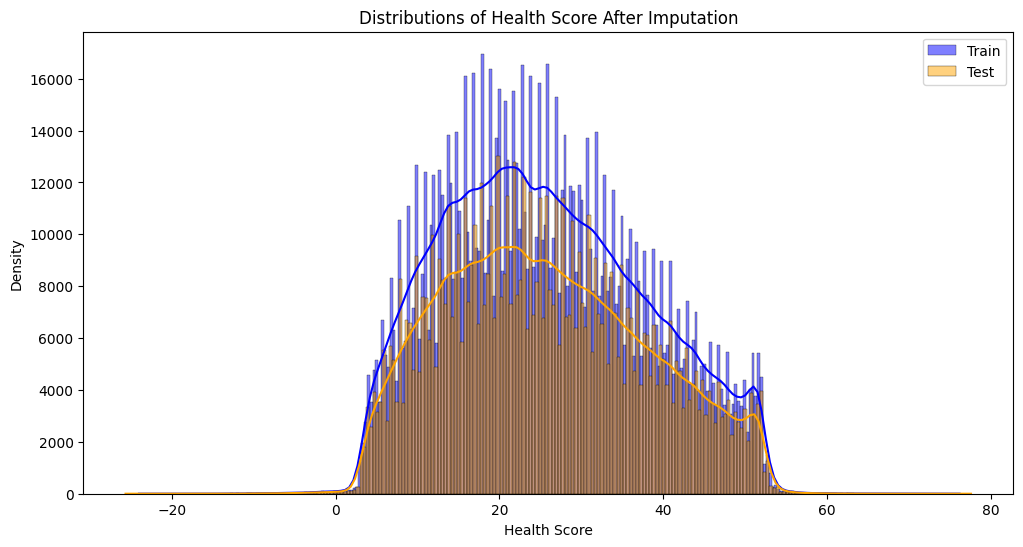

In [260]:
column_name = 'Health Score'  # Replace with your actual column name
train = data.copy()
tf = test.copy()
# Step 1: Fit a normal distribution on the training data
observed_values_train = train[column_name].dropna()
mu, sigma = observed_values_train.mean(), observed_values_train.std()

# Step 2: Impute missing values in the training dataset
missing_count_train = train[column_name].isna().sum()
imputed_values_train = np.random.normal(loc=mu, scale=sigma, size=missing_count_train)
train.loc[train[column_name].isna(), column_name] = imputed_values_train

# Step 3: Impute missing values in the testing dataset using the same distribution
missing_count_test = test[column_name].isna().sum()
imputed_values_test = np.random.normal(loc=mu, scale=sigma, size=missing_count_test)
test.loc[test[column_name].isna(), column_name] = imputed_values_test

# Step 4: Plot distributions to verify results
plt.figure(figsize=(12, 6))
sns.histplot(train[column_name], kde=True, color="blue", label="Train", alpha=0.5)
sns.histplot(test[column_name], kde=True, color="orange", label="Test", alpha=0.5)
plt.title("Distributions of Health Score After Imputation")
plt.xlabel("Health Score")
plt.ylabel("Density")
plt.legend()
plt.show()


In [261]:
print(train['Health Score'].isnull().sum())
print(test['Health Score'].isnull().sum())

0
0


In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  object 
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  object 
 7   Occupation              841925 non-null   object 
 8   Health Score            1200000 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         1200000 non-null  float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

In [263]:
data = train.copy()
test = test.copy()

##### __Occupation__ column

In [264]:
print(data['Occupation'].isnull().sum())
print(test['Occupation'].isnull().sum())

358075
239125


In [265]:
test['Occupation'].value_counts()

,count
Occupation,
Employed,188574
Self-Employed,187991
Unemployed,184310


In [266]:
data['Occupation'].fillna("Bekar",inplace=True)
test['Occupation'].fillna("Bekar",inplace=True)

<ipython-input-266-502019e18587>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Occupation'].fillna("Bekar",inplace=True)
<ipython-input-266-502019e18587>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [267]:
data['Occupation'].value_counts()

,count
Occupation,
Bekar,358075
Employed,282750
Self-Employed,282645
Unemployed,276530


In [268]:
print(data['Occupation'].isnull().sum())
print(test['Occupation'].isnull().sum())

0
0


##### __Marital Status__ column

In [269]:
print(data['Marital Status'].isnull().sum())
print(test['Marital Status'].isnull().sum())

18529
12336


In [270]:
data['Marital Status'].value_counts()

,count
Marital Status,
Single,395391
Married,394316
Divorced,391764


In [271]:
data['Marital Status'].fillna("Unknown_status",inplace=True)
test['Marital Status'].fillna("Unknown_status",inplace=True)

<ipython-input-271-cf995d21ac48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marital Status'].fillna("Unknown_status",inplace=True)
<ipython-input-271-cf995d21ac48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [272]:
print(data['Marital Status'].isnull().sum())
print(test['Marital Status'].isnull().sum())

0
0


In [273]:
data['Marital Status'].value_counts()

,count
Marital Status,
Single,395391
Married,394316
Divorced,391764
Unknown_status,18529


##### __Age__ column

In [274]:
print(data['Age'].isnull().sum())
print(test['Age'].isnull().sum())

18705
12489


<Axes: ylabel='Density'>

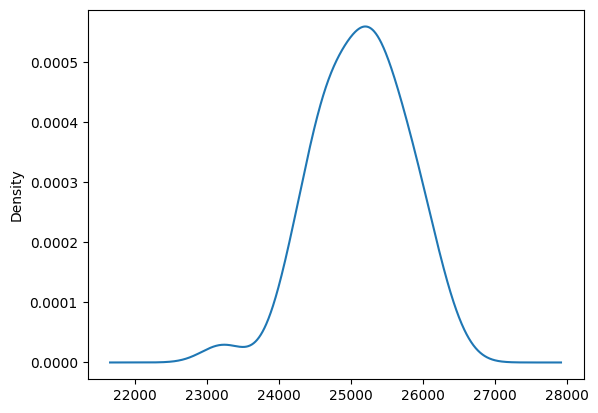

In [275]:
data['Age'].value_counts().plot(kind='kde')

In [276]:
data['Age'].value_counts()

,count
Age,
53.0,26354
61.0,26218
39.0,26042
64.0,25990
57.0,25971
43.0,25966
62.0,25849
46.0,25756
33.0,25728


In [277]:
data['Age'].mean()

41.145563131986506

In [278]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

<ipython-input-278-8c3b15987e46>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-278-8c3b15987e46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

<Axes: ylabel='Density'>

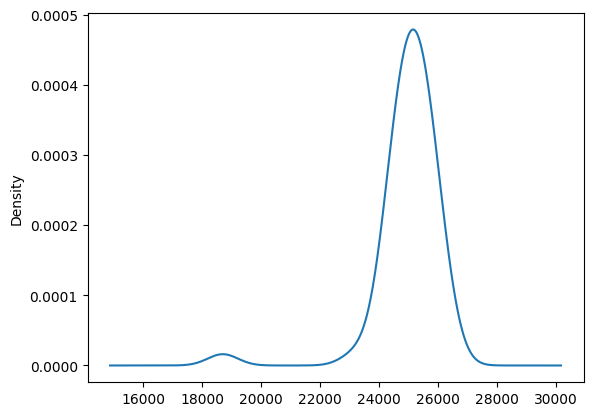

In [279]:
data['Age'].value_counts().plot(kind='kde')

In [280]:
data['Age'].mean()

41.14556313198648

##### __Annual Income__ column

In [281]:
print(data['Annual Income'].isnull().sum())
print(test['Annual Income'].isnull().sum())

44949
29860


<Axes: >

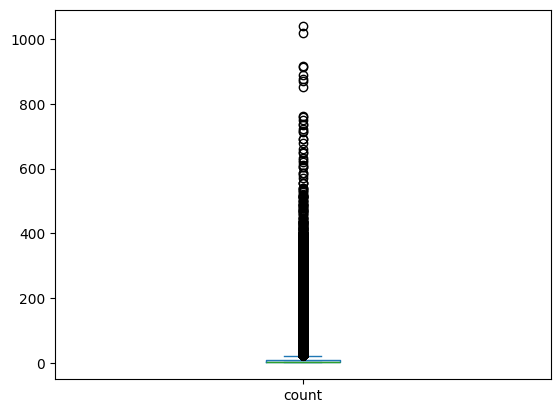

In [282]:
data['Annual Income'].value_counts().plot(kind='box')

In [283]:
data['Annual Income'].skew()

1.470357488204046

<ipython-input-284-35edc52feb7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income'], kde=True)


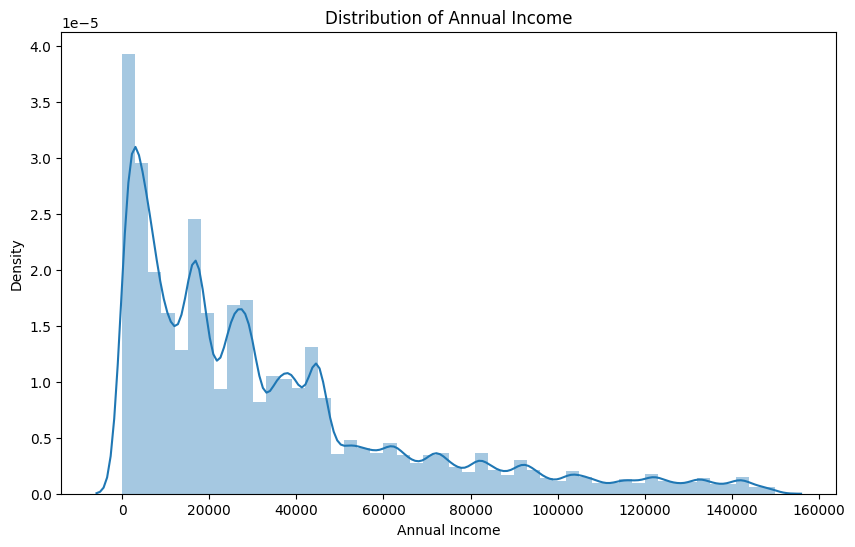

In [284]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

In [285]:
data['Annual Income'].fillna(data['Annual Income'].median(),inplace=True)
test['Annual Income'].fillna(test['Annual Income'].median(),inplace=True)

<ipython-input-285-f58f2c5c58c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Annual Income'].fillna(data['Annual Income'].median(),inplace=True)
<ipython-input-285-f58f2c5c58c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1200000 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1200000 non-null  float64
 4   Marital Status          1200000 non-null  object 
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  object 
 7   Occupation              1200000 non-null  object 
 8   Health Score            1200000 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         1200000 non-null  float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

##### __Number of Dependents__ column

In [287]:
print(data['Number of Dependents'].isnull().sum())
print(test['Number of Dependents'].isnull().sum())

109672
73130


In [288]:
data['Number of Dependents'].value_counts()

,count
Number of Dependents,
3.0,221475
4.0,220340
0.0,218124
2.0,215313
1.0,215076


In [289]:
data['Number of Dependents'].fillna("5.0",inplace=True)
test['Number of Dependents'].fillna("5.0",inplace=True)

<ipython-input-289-fac6b91bd0fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of Dependents'].fillna("5.0",inplace=True)
<ipython-input-289-fac6b91bd0fc>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Number of Dependents'].fillna("5.0",inplace=True)
<ipython-input-289-fac6b91bd0fc>:2: FutureWarning: A value is trying to be se

In [290]:
print(data['Number of Dependents'].isnull().sum())
print(test['Number of Dependents'].isnull().sum())

0
0


In [291]:
data['Number of Dependents'].value_counts()

,count
Number of Dependents,
3.0,221475
4.0,220340
0.0,218124
2.0,215313
1.0,215076
5.0,109672


In [292]:
# data = data['Number of Dependents'].get_dummies(data,columns='Number of Dependents',drop_first=True)
# test = test['Number of Dependents'].get_dummies(test,columns='Number of Dependents',drop_first=True)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1200000 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1200000 non-null  float64
 4   Marital Status          1200000 non-null  object 
 5   Number of Dependents    1200000 non-null  object 
 6   Education Level         1200000 non-null  object 
 7   Occupation              1200000 non-null  object 
 8   Health Score            1200000 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         1200000 non-null  float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  Po

##### __Credit Score__

In [294]:
print(data['Credit Score'].isnull().sum())
print(test['Credit Score'].isnull().sum())

137882
91451


<Axes: >

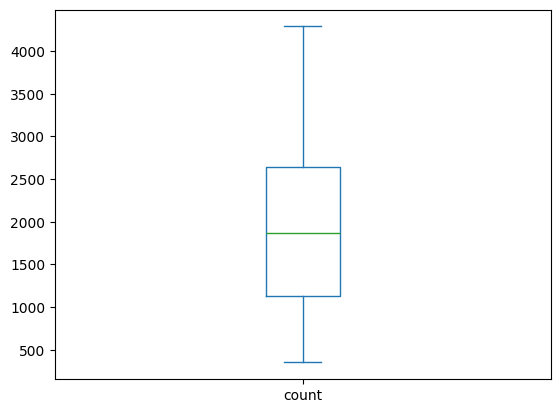

In [295]:
data['Credit Score'].value_counts().plot(kind='box')

**Tik tak kora lagbe**

In [296]:
data['Credit Score'].fillna(data['Credit Score'].median(),inplace=True)
test['Credit Score'].fillna(test['Credit Score'].median(),inplace=True)

<ipython-input-296-8576eab87eb5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Credit Score'].fillna(data['Credit Score'].median(),inplace=True)
<ipython-input-296-8576eab87eb5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1200000 non-null  float64
 2   Gender                  1200000 non-null  object 
 3   Annual Income           1200000 non-null  float64
 4   Marital Status          1200000 non-null  object 
 5   Number of Dependents    1200000 non-null  object 
 6   Education Level         1200000 non-null  object 
 7   Occupation              1200000 non-null  object 
 8   Health Score            1200000 non-null  float64
 9   Location                1200000 non-null  object 
 10  Policy Type             1200000 non-null  object 
 11  Previous Claims         1200000 non-null  float64
 12  Vehicle Age             1200000 non-null  float64
 13  Credit Score            1200000 non-null  float64
 14  Po

In [298]:
data.isnull().sum().sum()

0

In [299]:
data.shape,test.shape

((1200000, 29), (800000, 28))

In [300]:
objectType

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Policy Start Date',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [301]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
test = pd.get_dummies(test, columns=['Gender'], drop_first=True)

In [302]:
data = pd.get_dummies(data, columns=['Marital Status'], drop_first=True)
test = pd.get_dummies(test, columns=['Marital Status'], drop_first=True)

In [303]:
data = pd.get_dummies(data, columns=['Education Level'], drop_first=True)
test = pd.get_dummies(test, columns=['Education Level'], drop_first=True)

In [304]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first=True)
test = pd.get_dummies(test, columns=['Occupation'], drop_first=True)

In [305]:
data = pd.get_dummies(data, columns=['Location'], drop_first=True)
test = pd.get_dummies(test, columns=['Location'], drop_first=True)

In [306]:
data = pd.get_dummies(data, columns=['Policy Type'], drop_first=True)
test = pd.get_dummies(test, columns=['Policy Type'], drop_first=True)

In [307]:
data.drop(columns=['Policy Start Date'],inplace=True)
test.drop(columns=['Policy Start Date'],inplace=True)

In [308]:
# data = pd.get_dummies(data, columns=['Policy Start Date'], drop_first=True)
# test = pd.get_dummies(test, columns=['Policy Start Date'], drop_first=True)

In [309]:
data.shape,test.shape

((1200000, 36), (800000, 35))

In [310]:
data = pd.get_dummies(data, columns=['Smoking Status'], drop_first=True)
test = pd.get_dummies(test, columns=['Smoking Status'], drop_first=True)

In [311]:
data = pd.get_dummies(data, columns=['Exercise Frequency'], drop_first=True)
test = pd.get_dummies(test, columns=['Exercise Frequency'], drop_first=True)

In [312]:
data = pd.get_dummies(data, columns=['Property Type'], drop_first=True)
test = pd.get_dummies(test, columns=['Property Type'], drop_first=True)

In [313]:
data.shape,test.shape

((1200000, 39), (800000, 38))

In [314]:
# Replace True with 1 and False with 0 in both data and test DataFrames
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

for col in test.columns:
    if test[col].dtype == 'bool':
        test[col] = test[col].astype(int)

#Train test split

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [316]:
X = data.drop('Premium Amount',axis=1)
y = data['Premium Amount']

In [317]:
X.shape,y.shape

((1200000, 38), (1200000,))

In [318]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [319]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [320]:
x_train

array([[-0.5645078 ,  0.28641617,  1.8625512 , ..., -0.58588589,
        -0.70676707,  1.41281266],
       [ 0.42881446,  0.73321925, -0.8581168 , ..., -0.58588589,
         1.41489332, -0.70780793],
       [-0.47326536,  0.50981771,  0.28150583, ..., -0.58588589,
         1.41489332, -0.70780793],
       ...,
       [-1.35076237,  0.13748182,  1.67749455, ..., -0.58588589,
         1.41489332, -0.70780793],
       [ 0.20560934,  0.58428489, -0.83825768, ..., -0.58588589,
         1.41489332, -0.70780793],
       [-1.37955055,  1.18002232,  3.14441321, ..., -0.58588589,
        -0.70676707, -0.70780793]])

In [321]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_log_error as loss

In [322]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(r2_score(y_test,y_pred))
print(loss(y_test,y_pred))

0.03177957908885698
1.151633200434971


In [323]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values, adjust as needed
    'learning_rate': [0.01, 0.1, 0.2],  # Example values, adjust as needed
    'max_depth': [3, 5, 7],  # Example values, adjust as needed
    # Add other hyperparameters you want to tune
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42) # Set random_state for reproducibility

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_log_error', # Use appropriate scoring metric
    cv=5, # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2 # More verbose output
)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(x_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"RMSLE: {loss(y_test,y_pred)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-1.16896347 -1.16627839 -1.16461749 -1.16289148 -1.15961752 -1.15759715
 -1.15774468 -1.1537617  -1.15230954 -1.15887986 -1.15658956 -1.15542734
 -1.15275739 -1.15138338 -1.15058192 -1.15018191 -1.14946643 -1.14926796
 -1.15628051 -1.15452918 -1.15361326 -1.15115263 -1.15048195         nan
 -1.14953388         nan         nan]
  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
R-squared: 0.03232140969761055
RMSLE: 1.1511116432078419


In [325]:
test.head()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Customer Feedback_Good,Customer Feedback_Poor,...,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,1200000,28.0,2310.0,4.0,7.657981,0.0,19.0,595.0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,1200001,31.0,126031.0,2.0,13.381379,0.0,14.0,372.0,1,0,...,1,0,0,1,1,0,1,0,0,0
2,1200002,47.0,17092.0,0.0,24.354527,0.0,16.0,819.0,0,0,...,0,1,1,0,1,1,0,0,1,0
3,1200003,28.0,30424.0,3.0,5.136225,1.0,3.0,770.0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,1200004,24.0,10863.0,2.0,11.844155,0.0,14.0,755.0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [326]:
# Assuming 'test' DataFrame and 'best_model' from the previous code are available.

# Preprocess the test data using the same scaler fitted on the training data
test_scaled = sc.transform(test)

# Make predictions on the scaled test data
predictions = best_model.predict(test_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'Premium Amount': predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)